In [5]:
import json
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
import matplotlib.colors as colors

from input2json import parse_text_to_dict, save_to_json, stringTuple_to_array, dict2obj


# returns output JSON object as python dictionary
with open('output.json') as f:
    outputDict = json.load(f)

output = dict2obj(outputDict)

pinFiss = output.active.pinFiss

# pin space map
pinResults =np.sum(np.array(pinFiss.Res).T, axis=4) # sum along the energy axis
pinResults_std = pinResults[1,0].T
pinResults_values = pinResults[0,0].T
x_coordsPin = np.array(pinFiss.XBounds).T
y_coordsPin = np.array(pinFiss.YBounds).T
x_coords_averagedPin =  (x_coordsPin[0,:] + x_coordsPin[1,:]) / 2
y_coords_averagedPin =  (y_coordsPin[0,:] + y_coordsPin[1,:]) / 2

# pin energy map
energyBinsPin = np.array(output.active.pinFiss.EnergyBounds).T
energyBins_averagedPin = (energyBinsPin[:,0] + energyBinsPin[:,1]) / 2
pinResults_energy = np.sum(np.array(output.active.pinFiss.Res).T, axis=(0,1,2,3))

# combined energy-space map in x
energyX_pin = np.sum(np.array(output.active.pinFiss.Res).T, axis=(0,1,3)).T


# SCALING reaction rates by volume
# volume of one unit
deltaX = abs(x_coords_averagedPin[1] - x_coords_averagedPin[0])
deltaY = abs(y_coords_averagedPin[1] - y_coords_averagedPin[0])
unitVol_pin = deltaX * deltaY * 1 # cm in z



# assembly space map
asResults = np.sum(np.array(output.active.assemblyFissRadial.Res).T, axis=4)
asResults_std = asResults[1,0].T
asResults_values = asResults[0,0].T
x_coordsAs = np.array(output.active.assemblyFissRadial.XBounds).T
y_coordsAs = np.array(output.active.assemblyFissRadial.YBounds).T
x_coords_averagedAs =  (x_coordsAs[0,:] + x_coordsAs[1,:]) / 2
y_coords_averagedAs =  (y_coordsAs[0,:] + y_coordsAs[1,:]) / 2


# assembly energy map
energyBinsAs = np.array(output.active.assemblyFissRadial.EnergyBounds).T
energyBins_averagedAs = (energyBinsAs[:,0] + energyBinsAs[:,1]) / 2
asResults_energy = np.sum(np.array(output.active.assemblyFissRadial.Res).T, axis=(0,1,2,3))


# combined energy-space map in x (at y=0?)
# energyX_as = np.sum(np.array(output.active.assemblyFissRadial.Res).T, axis=(0,1,3)).T
energyX_as = np.array(output.active.assemblyFissRadial.Res).T[0,0,:,2,:]


# SCALING reaction rates by volume
# volume of one unit
deltaX = abs(x_coords_averagedAs[1] - x_coords_averagedAs[0])
deltaY = abs(y_coords_averagedAs[1] - y_coords_averagedAs[0])
unitVol_as = deltaX * deltaY * 1 # cm in z


shannonEntropy = np.array(output.inactive.shannon.shannonEntropy)


In [6]:
# read in scattering outputs

scatteringMatrix = output.active.scatteringMatrices

capture = scatteringMatrix.capture
fission = scatteringMatrix.fission
transportFluxLimited = scatteringMatrix.transportFluxLimited
transportOutScatter = scatteringMatrix.transportOutScatter
nu = scatteringMatrix.nu
chi = scatteringMatrix.chi
P0 = scatteringMatrix.P0
P1 = scatteringMatrix.P1
P2 = scatteringMatrix.P2
P3 = scatteringMatrix.P3
P4 = scatteringMatrix.P4
P5 = scatteringMatrix.P5
P6 = scatteringMatrix.P6
P7 = scatteringMatrix.P7
prod = scatteringMatrix.prod
print(capture)


[[0.000987706, 1.02878e-06], [0.00122141, 5.72663e-07], [0.00270464, 1.36726e-06], [0.0162909, 1.57773e-05], [0.0450644, 3.69792e-05], [0.0648287, 5.36696e-05], [0.0701131, 6.83312e-05], [0.064335, 6.30262e-05], [0.0960319, 0.000100066], [0.194124, 0.000506984]]


In [10]:
# read in inputs

inputDict = parse_text_to_dict('singleAssembly')
save_to_json(inputDict, 'input.json')
input = dict2obj(inputDict)

activeCyles = input.active
inactiveCycles = input.inactive
print(activeCyles, 'active cycles')



200 active cycles


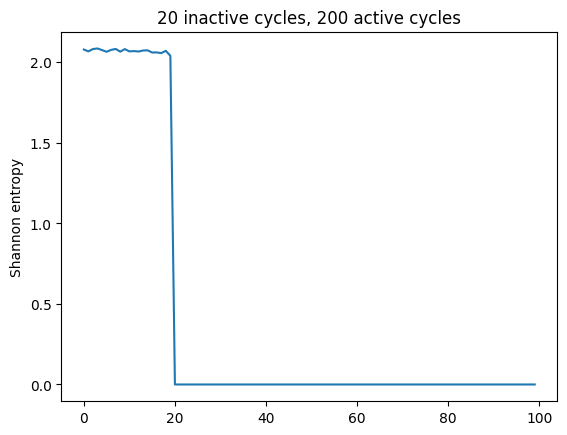

In [11]:
fig, ax = plot.subplots()
ax.plot(shannonEntropy[:inactiveCycles+activeCyles])
ax.set_ylabel('Shannon entropy')
plot.title(str(inactiveCycles) + ' inactive cycles, ' + str(activeCyles) + ' active cycles')
plot.show()

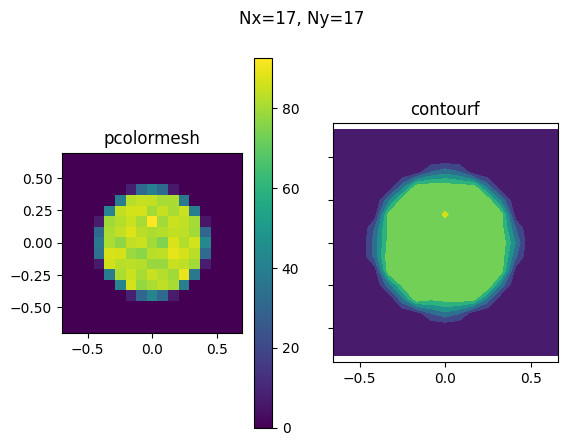

In [12]:
# Plot fission results
fig, (ax1, ax2) = plot.subplots(1,2, sharex='col', sharey=True)
val = ax1.pcolormesh( x_coords_averagedPin, y_coords_averagedPin, pinResults_values / unitVol_pin)
val2 = ax2.contourf( x_coords_averagedPin, y_coords_averagedPin, pinResults_values / unitVol_pin)
# val2 = ax2.imshow( fissionResults_values)


ax1.set_title('pcolormesh')
ax2.set_title('contourf')
ax1.set_aspect('equal')
ax2.set_aspect('equal')
# ax3.set_title('imshow')
fig.colorbar(val)
fig.suptitle("Nx={:.0f}, Ny={:.0f}".format(len(x_coords_averagedPin), len(y_coords_averagedPin)))

plot.show()

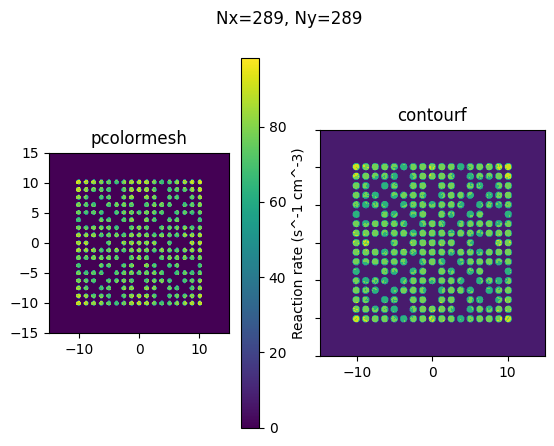

In [13]:
# Plot fission results
fig, (ax1, ax2) = plot.subplots(1,2, sharex='col', sharey=True)
val = ax1.pcolormesh( x_coords_averagedAs, y_coords_averagedAs, asResults_values / unitVol_as)
val2 = ax2.contourf( x_coords_averagedAs, y_coords_averagedAs, asResults_values / unitVol_as)
# val2 = ax2.imshow( fissionResults_values)


ax1.set_title('pcolormesh')
ax2.set_title('contourf')
ax1.set_aspect('equal')
ax2.set_aspect('equal')

# ax3.set_title('imshow')
fig.colorbar(val, label='Reaction rate (s^-1 cm^-3)')
fig.suptitle("Nx={:.0f}, Ny={:.0f}".format(len(x_coords_averagedAs), len(y_coords_averagedAs)))
# plot.gca().set_aspect('equal', adjustable=None)
plot.show()

/tmp/ipykernel_1142/205340877.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.sharex(ax2)


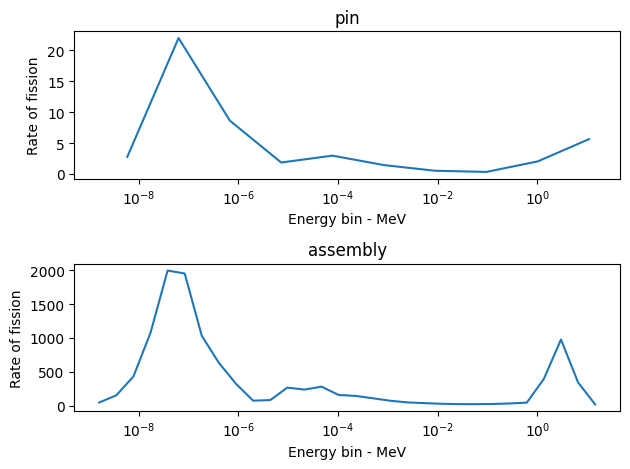

In [14]:
# plot energy map

fig, (ax1, ax2) = plot.subplots(2,1)
ax1.set_title('pin')
ax1.plot(energyBins_averagedPin, pinResults_energy)
ax1.set_xscale('log')
ax1.set_xlabel('Energy bin - MeV')
ax1.set_ylabel('Rate of fission')

ax1.sharex(ax2)
ax2.set_title('assembly')
ax2.plot(energyBins_averagedAs, asResults_energy)
ax2.set_xscale('log')
ax2.set_xlabel('Energy bin - MeV')
ax2.set_ylabel('Rate of fission')
plot.tight_layout()
plot.show()

In [15]:
# plot combined energy-space map. Radial direction.Taking a line outwards along y=0

# Plot fission results
fig, (ax1, ax2) = plot.subplots(1,2, sharex='col', sharey=True)
val = ax1.pcolormesh( x_coords_averagedPin, energyBins_averagedPin, energyX_pin, norm=colors.LogNorm(vmin=energyX_pin.min(), vmax=energyX_pin.max()) )
# val2 = ax2.contourf( x_coords_averagedAs, y_coords_averagedAs, asResults_values / unitVol_as)
# val2 = ax2.imshow( fissionResults_values)
plot.show()

ValueError: Invalid vmin or vmax

<Figure size 640x480 with 2 Axes>

In [16]:
# plot combined energy-space map. Radial direction.Taking a line outwards along y=0

# Plot fission results
fig, ax1 = plot.subplots()
val = ax1.pcolormesh( x_coords_averagedAs, energyBins_averagedAs, energyX_as),  norm=colors.LogNorm(vmin=energyX_as.min(), vmax=energyX_as.max()))
ax1.set_xlabel('x (cm)')
ax1.set_ylabel('Energy')
ax1.set_yscale('log')
fig.colorbar(val, label = 'fission rate')

plot.show()

SyntaxError: unmatched ')' (1108247122.py, line 5)